# Batch gradient descent

In [13]:
#importing required depedencies
import numpy as np                  #for numerical calculation
import matplotlib.pyplot as plt     #for data visualization

# setting matplotlib plotting parameters
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rc('font', family='serif')

## Generate sample data for $y = mx + c$  equation

In [14]:
sample_size = 100                                 # Sample size
x = 2*np.random.rand(sample_size,1)               #generate sample data for x                        
y = 4 + 3*x + np.random.rand(sample_size, 1)      #generate sample data for y
x_b = np.c_[np.ones((sample_size,1)), x]          #add bias X0 = 1
x_new = np.array([[0],[2]])                       # making prediction at x_new value
x_new_b = np.c_[np.ones((2,1)), x_new]            # adding bias to x_new value


In [25]:
def fit_and_plot(eta, sample_size, n_iteration, x_b, y):
    theta = np.random.rand(x_b.shape[1],1)                                     #random initialization of theta

    for i in range(n_iteration):                                    #iterate over range of number of iteration
        gradient = 2/sample_size * (x_b.T).dot(x_b.dot(theta)- y)   #calculating batch gradient
        theta = theta - eta * gradient                              #calculating next theta
        y_predict = x_b.dot(theta)                                  #predict value 
        plt.plot(x, y_predict, label=f"epoch:{i}")             #plot predicted value
        plt.scatter(x, y)                                        #plot scatter plot of give input x, y
        plt.xlabel('x-axis')                               
        plt.ylabel('y-axis')                               
        plt.title(r"$\eta = $" +f'{eta}')                         #define plot title
        plt.legend()                                       
    print(f"Learning rate: {eta} | Final epoch theta: {theta[0], theta[1]}")


Learning rate: 0.01 | Final epoch theta: (array([1.75544523]), array([1.52760465]))
Learning rate: 0.1 | Final epoch theta: (array([3.42761939]), array([3.93126981]))
Learning rate: 0.5 | Final epoch theta: (array([-4.99484372]), array([-7.05872401]))


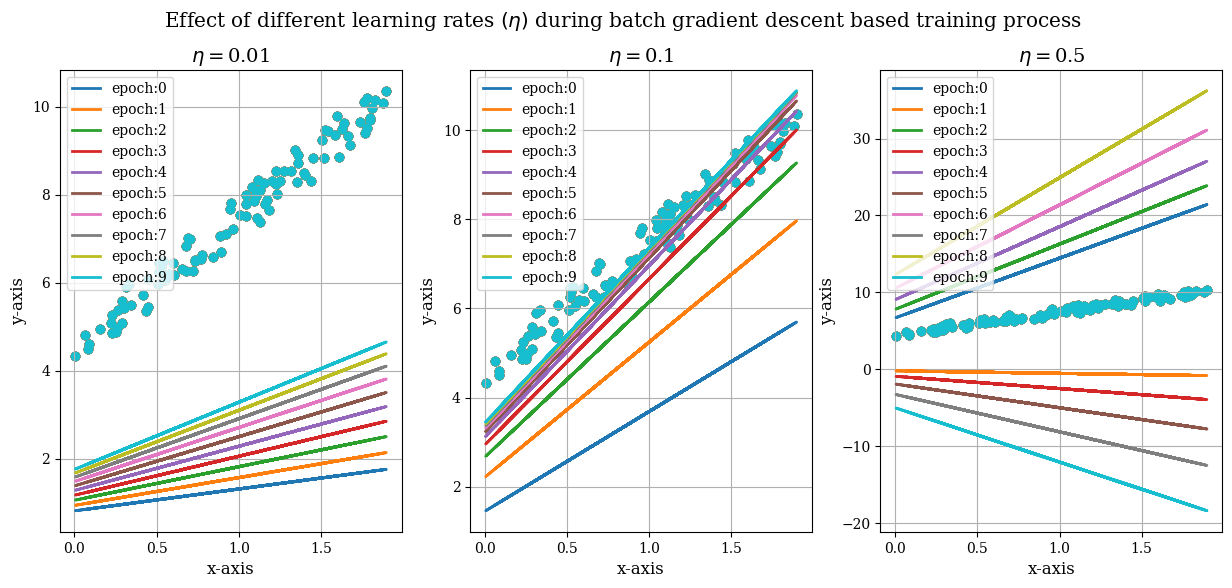

In [26]:
plt.figure(figsize=[15,6])
eta_list = [0.01, 0.1, 0.5]

for i in range(1, 4):
    plt.subplot(1, 3, i)
    fit_and_plot(eta_list[i-1], sample_size, 10, x_b, y)
    plt.grid()
    plt.suptitle(r"Effect of different learning rates $(\eta)$ during batch gradient descent based training process")

### Comparing batch gradient descent result with analytical solution

In [27]:
best_theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
best_theta

array([[4.47354408],
       [3.03296163]])

> Visualizing learning rate in gradient descent helped to understand the slow moving versus highly fluctuating movement of gradient during   training